In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score, mean_squared_error

In [113]:
# df = pd.read_csv('retail.csv', keep_default_na=False)
df = pd.read_csv('retail.csv')
# df.head()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [115]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.84775,0.066132,140.992782,1997.831867,2181.288914
std,4.22618,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.80000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [116]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Data Pre-processing

In [117]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [118]:
df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat',inplace=True)
df['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)

In [119]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [120]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [121]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [122]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [123]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'],margins=False)

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [124]:
df.loc[(df['Outlet_Size'].isna())&(df['Outlet_Location_Type'] == 'Tier 2'),'Outlet_Size'] = 'Small'

In [125]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [126]:
df = df.drop(index=df.index[-1])

In [127]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [128]:
df[df['Outlet_Size'].isna()].shape

(555, 12)

In [129]:
df.loc[(df['Outlet_Size'].isna())&(df['Outlet_Type'] == 'Grocery Store'),'Outlet_Size'] = 'Small'

In [130]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [131]:
df[df['Outlet_Size'].isna()].shape

(0, 12)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                8522 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                8522 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [133]:
def plotvariable(df1, variable):
    plt.figure(figsize = (16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha = 0.5)
    plt.subplot(1,2,2)
    sns.boxplot(df1[variable])
    plt.show()

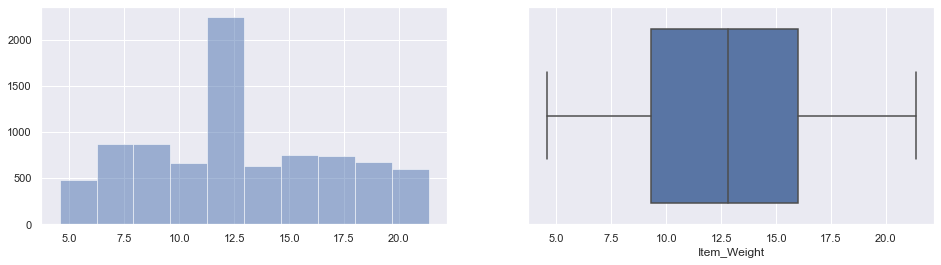

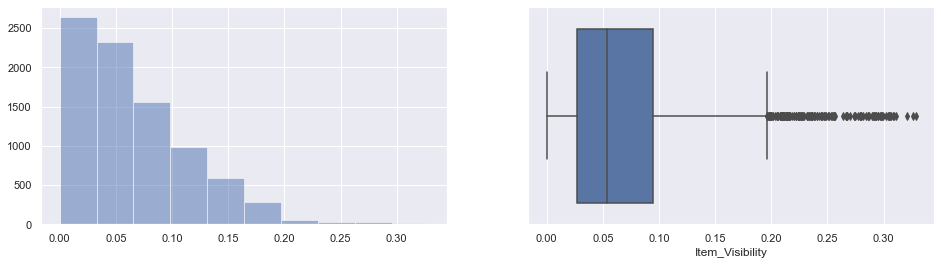

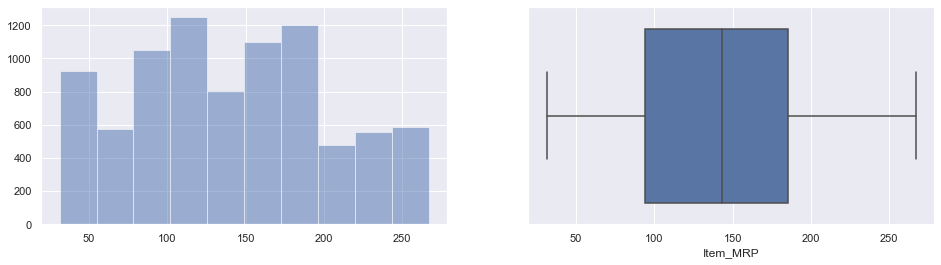

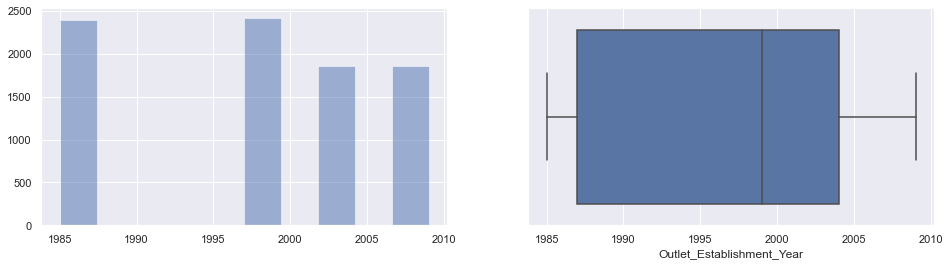

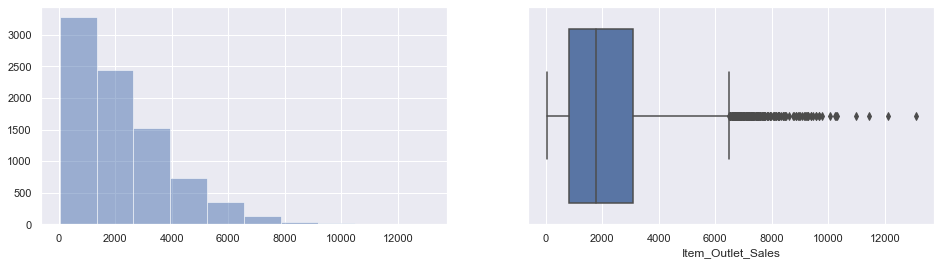

In [134]:
plotvariable(df, 'Item_Weight')

plotvariable(df, 'Item_Visibility')
plotvariable(df, 'Item_MRP')
plotvariable(df, 'Outlet_Establishment_Year')
plotvariable(df, 'Item_Outlet_Sales')

In [135]:
def find_boundaries(df1, variables):
    Q1 = df1[variables].quantile(.25)
    Q3 = df1[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    return lower_range , upper_range

In [137]:
lower_boundary , upper_boundary = find_boundaries(df, 'Item_Visibility')
print('upper limit is:', upper_boundary)
print('lower limit is:', lower_boundary)

lower_boundary1 , upper_boundary1 = find_boundaries(df, 'Item_Outlet_Sales')
print('upper limit is:', upper_boundary1)
print('upper limit is:', lower_boundary1)

upper limit is: 0.19600398725
lower limit is: -0.07442171674999999
upper limit is: 6500.8712000000005
upper limit is: -2564.6616000000004


In [138]:
df1 = df.copy()
df1['Item_Visibility'] = np.where(df1['Item_Visibility'] > upper_boundary,upper_boundary, np.where(df1['Item_Visibility'] < lower_boundary, lower_boundary, df1['Item_Visibility'] ))

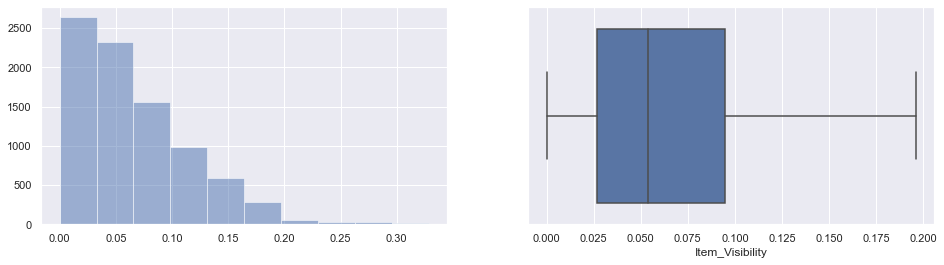

In [139]:
plotvariable(df1, 'Item_Visibility')

### Data Visualization

In [140]:
sns.set()

In [141]:
def plot(variable):
    plt.figure(figsize = (4,4))
    sns.distplot(variable)
    plt.show()

In [142]:
def count(variable):
    plt.figure(figsize = (36,6))
    sns.countplot(variable)
    plt.show()

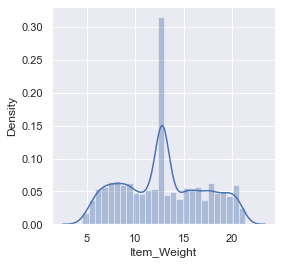

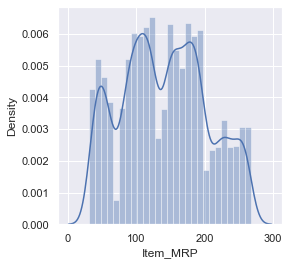

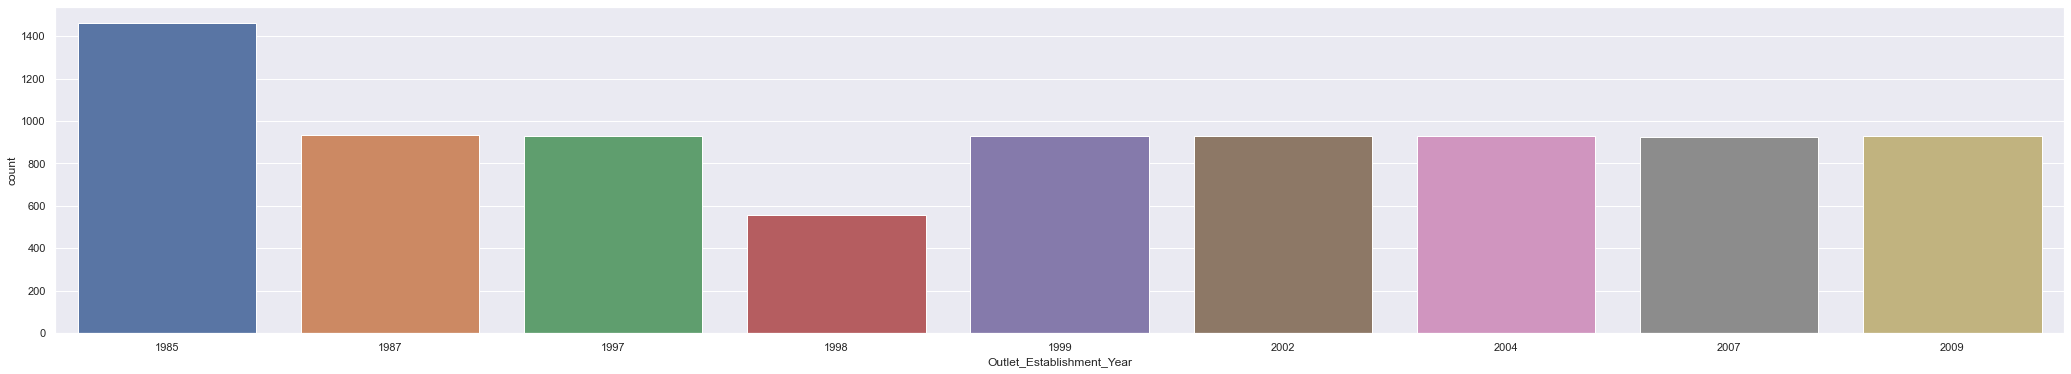

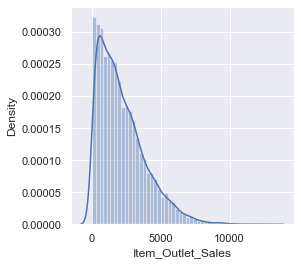

In [143]:
plot(df['Item_Weight'])
plot(df['Item_MRP'])
count(df['Outlet_Establishment_Year'])
plot(df['Item_Outlet_Sales'])

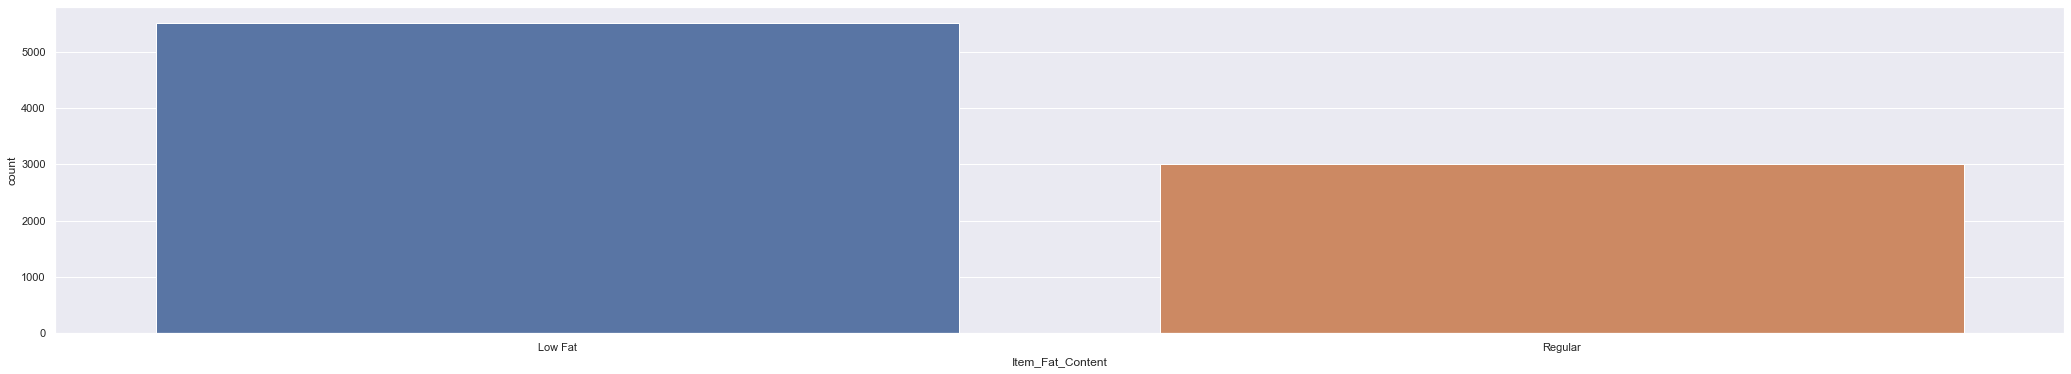

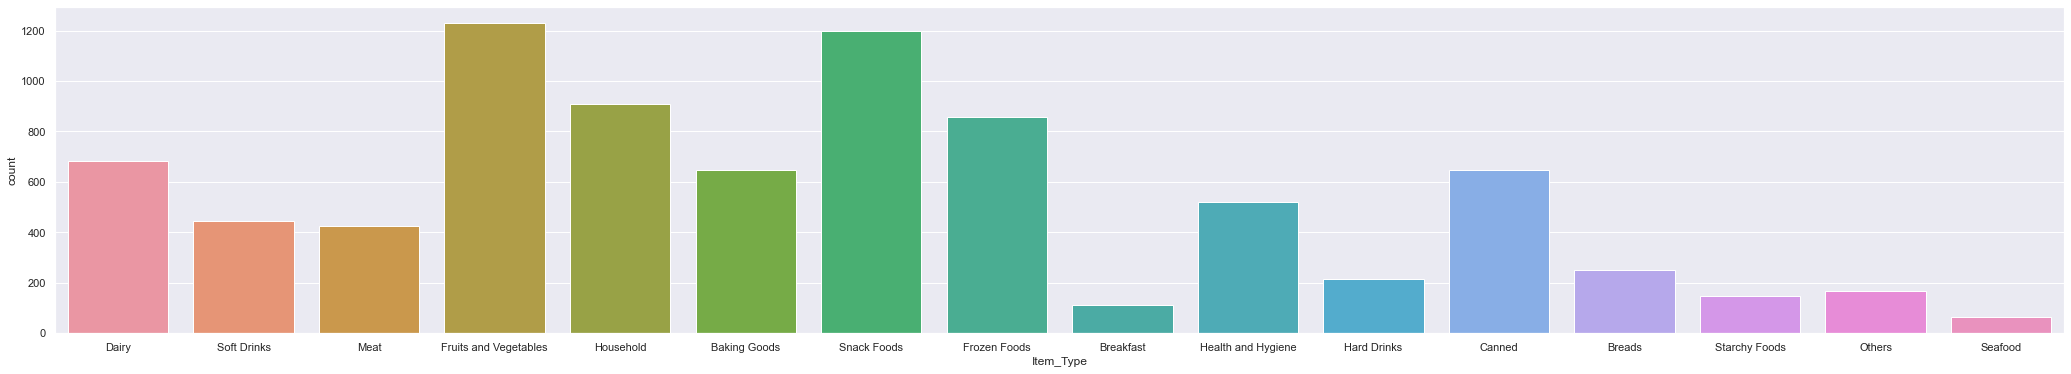

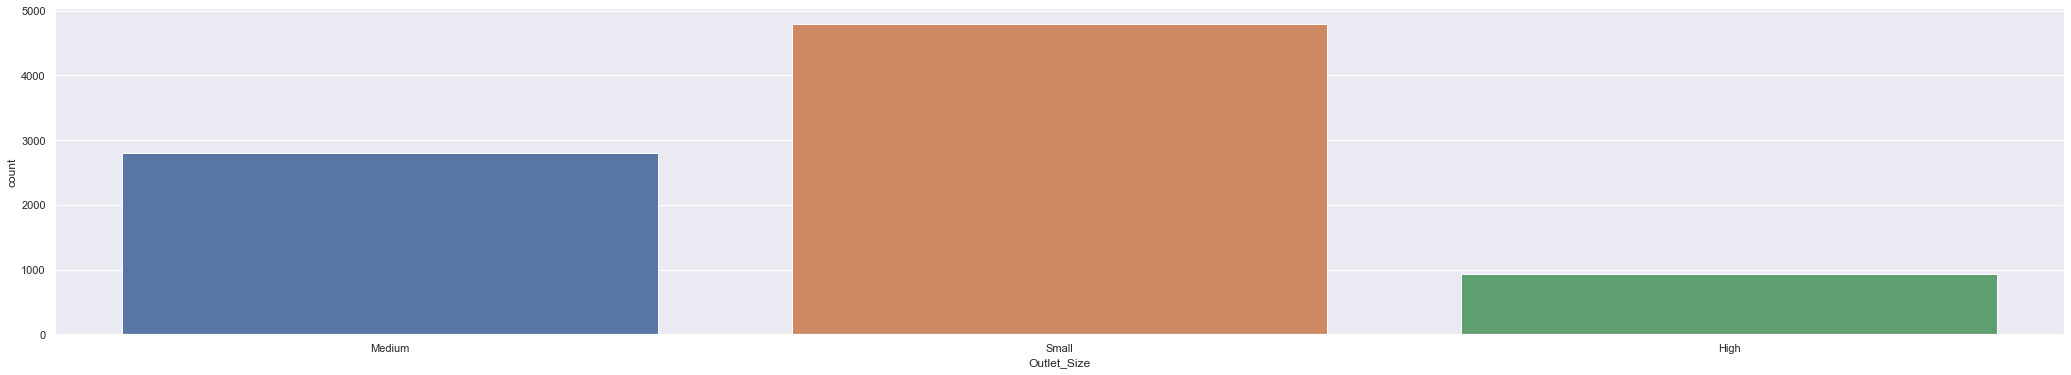

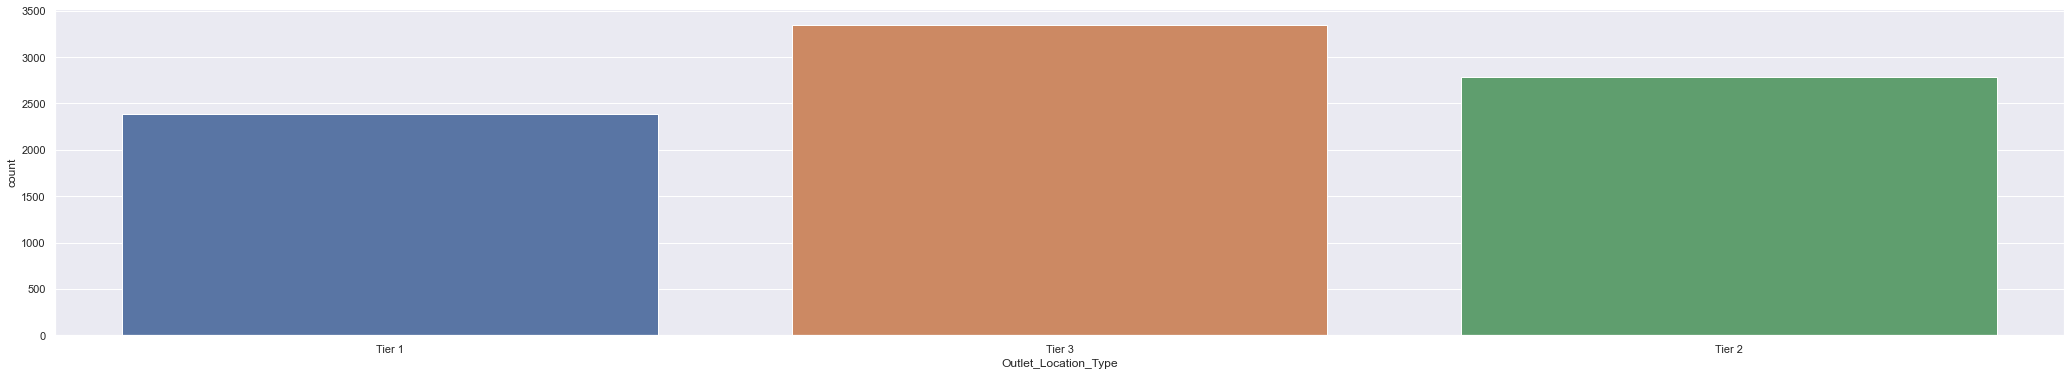

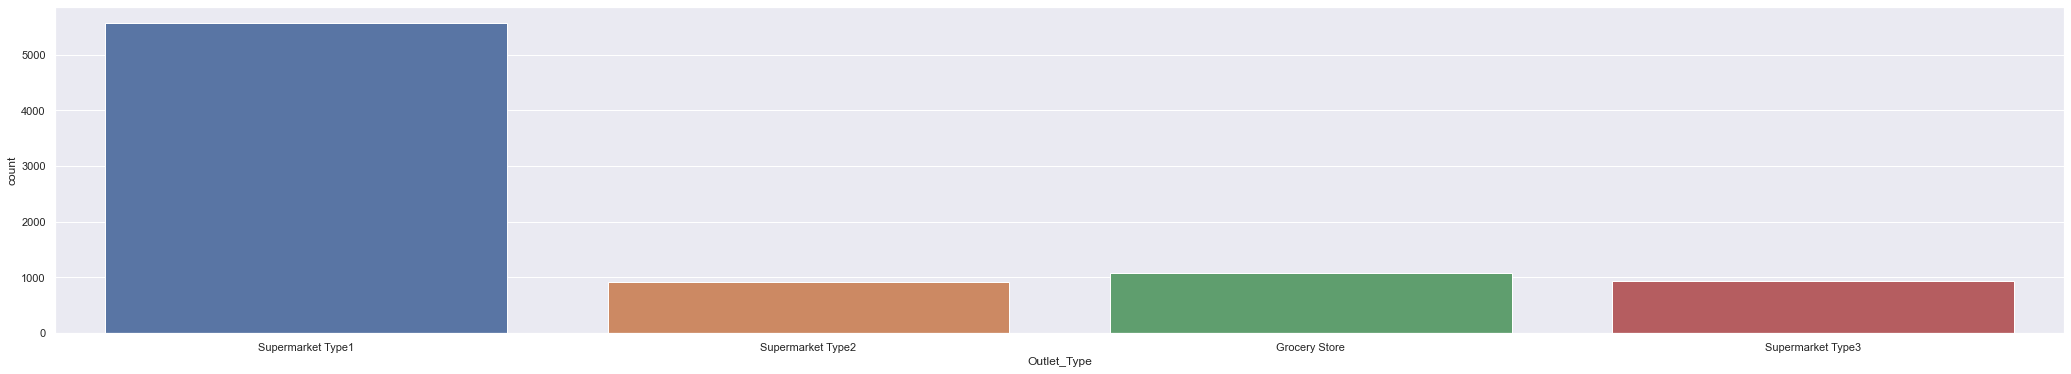

In [144]:
count(df['Item_Fat_Content'])
count(df['Item_Type'])
count(df['Outlet_Size'])
count(df['Outlet_Location_Type'])
count(df['Outlet_Type'])

<AxesSubplot:>

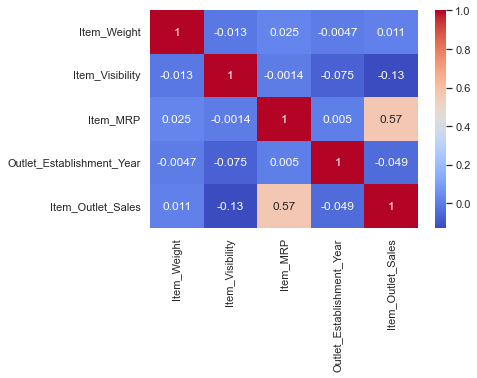

In [145]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm')

In [146]:
df1 = df1.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Item_Weight','Outlet_Establishment_Year'], axis='columns')

In [147]:
df1

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...
8517,Regular,Frozen Foods,178.8318,Small,Tier 1,Supermarket Type1,3608.6360
8518,Low Fat,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,Regular,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136


In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Item_Outlet_Sales ~ Item_Type', data=df1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Item_Type,1.171571e+08,15.0,2.689919,0.000411
Residual,2.469810e+10,8506.0,NaN,NaN


In [149]:
model1 = ols('Item_Outlet_Sales ~ Outlet_Size', data=df1).fit()
sm.stats.anova_lm(model1, typ=2)

,sum_sq,df,F,PR(>F)
Outlet_Size,1.184634e+09,2.0,213.534343,3.257189e-91
Residual,2.363063e+10,8519.0,NaN,NaN


In [150]:
model2 = ols('Item_Outlet_Sales ~ Item_Fat_Content', data=df1).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
Item_Fat_Content,8.629479e+06,1.0,2.963851,0.085181
Residual,2.480663e+10,8520.0,NaN,NaN


In [151]:
model3 = ols('Item_Outlet_Sales ~ Outlet_Location_Type', data=df1).fit()
sm.stats.anova_lm(model3, typ=2)

,sum_sq,df,F,PR(>F)
Outlet_Location_Type,3.095815e+08,2.0,53.81049,5.981147e-24
Residual,2.450568e+10,8519.0,NaN,NaN


In [152]:
model4 = ols('Item_Outlet_Sales ~ Outlet_Type', data=df1).fit()
sm.stats.anova_lm(model4, typ=2)

,sum_sq,df,F,PR(>F)
Outlet_Type,5.946004e+09,3.0,894.719221,0.0
Residual,1.886926e+10,8518.0,NaN,NaN


In [153]:
df2 = df1.drop(['Item_Fat_Content'], axis='columns')

### Table to be used for further process

In [154]:
df2

,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800
4,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8517,Frozen Foods,178.8318,Small,Tier 1,Supermarket Type1,3608.6360
8518,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136


### Encoding the categorical columns

In [155]:
le_Item_Type = LabelEncoder()
le_Outlet_Location_Type = LabelEncoder()
le_Outlet_Type = LabelEncoder()

In [156]:
df2['Item_Type']=le_Item_Type.fit_transform(df2['Item_Type'])
df2['Outlet_Location_Type']=le_Outlet_Location_Type.fit_transform(df2['Outlet_Location_Type'])
df2['Outlet_Type']=le_Outlet_Type.fit_transform(df2['Outlet_Type'])

In [157]:
df2

,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,4,249.8092,Medium,0,1,3735.1380
1,14,48.2692,Medium,2,2,443.4228
2,10,141.6180,Medium,0,1,2097.2700
3,6,182.0950,Small,2,0,732.3800
4,9,53.8614,High,2,1,994.7052
...,...,...,...,...,...,...
8517,5,178.8318,Small,0,1,3608.6360
8518,13,214.5218,High,2,1,2778.3834
8519,0,108.1570,Small,1,1,549.2850
8520,8,85.1224,Small,1,1,1193.1136


In [158]:
df3 = pd.get_dummies(df2,columns=['Outlet_Size'],drop_first=True)

In [159]:
df3

,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_Medium,Outlet_Size_Small
0,4,249.8092,0,1,3735.1380,1,0
1,14,48.2692,2,2,443.4228,1,0
2,10,141.6180,0,1,2097.2700,1,0
3,6,182.0950,2,0,732.3800,0,1
4,9,53.8614,2,1,994.7052,0,0
...,...,...,...,...,...,...,...
8517,5,178.8318,0,1,3608.6360,0,1
8518,13,214.5218,2,1,2778.3834,0,0
8519,0,108.1570,1,1,549.2850,0,1
8520,8,85.1224,1,1,1193.1136,0,1


### Splitting the data

In [160]:
features = df3.drop(['Item_Outlet_Sales'], axis='columns')
target = df3['Item_Outlet_Sales']

In [161]:
features

,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Size_Medium,Outlet_Size_Small
0,4,249.8092,0,1,1,0
1,14,48.2692,2,2,1,0
2,10,141.6180,0,1,1,0
3,6,182.0950,2,0,0,1
4,9,53.8614,2,1,0,0
...,...,...,...,...,...,...
8517,5,178.8318,0,1,0,1
8518,13,214.5218,2,1,0,0
8519,0,108.1570,1,1,0,1
8520,8,85.1224,1,1,0,1


In [162]:
target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8517    3608.6360
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
Name: Item_Outlet_Sales, Length: 8522, dtype: float64

In [163]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

### Linearity

In [164]:
lr = LinearRegression()

In [165]:
lr.fit(features_train, target_train)

LinearRegression()

In [166]:
c = lr.intercept_
c

-306.51947496970433

In [167]:
m = lr.coef_
m

array([-8.07407744e-01,  1.55110881e+01, -4.64512014e+02,  1.34527839e+03,
       -1.27018051e+03, -6.78930488e+02])

In [168]:
target_pred_train = lr.predict(features_train)
target_pred_train

array([3242.13768556, 4976.19388152, 4458.33459378, ..., 1100.82737861,
       1774.43715295, 2580.46873313])

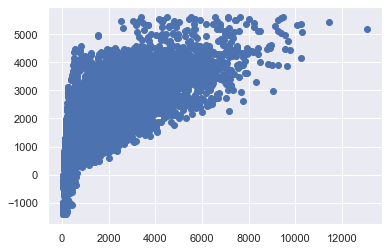

In [169]:
plt.scatter(target_train, target_pred_train)

In [170]:
r2 = r2_score(target_train, target_pred_train)
r2

0.523945081802224

In [171]:
target_pred_test = lr.predict(features_test)
target_pred_test

array([2264.42480014, 3765.42656679, -428.81556717, ..., 2800.87387873,
       3051.44743627, 2500.16208193])

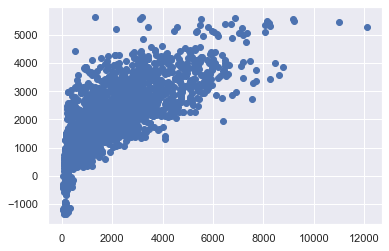

In [172]:
plt.scatter(target_test, target_pred_test)

In [173]:
r2 = r2_score(target_test, target_pred_test)
r2

0.5329891194764309

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
  
print(vif_data)

                feature       VIF
0             Item_Type  3.535632
1              Item_MRP  4.933277
2  Outlet_Location_Type  3.891925
3           Outlet_Type  8.399675
4    Outlet_Size_Medium  4.940987
5     Outlet_Size_Small  3.678736


In [175]:
vif = 1/(1-r2**2)
vif

1.3967990423372965

### Mean of Residuals

In [176]:
residuals = target_train.values-target_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -4.3066582034956907e-13


### Check for Homoscedasticity

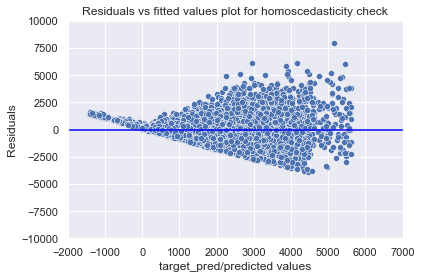

In [177]:
p = sns.scatterplot(target_pred_train,residuals)
plt.xlabel('target_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10000,10000)
plt.xlim(-2000,7000)
p = sns.lineplot([-5000,7000],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### Check for Normality of error terms

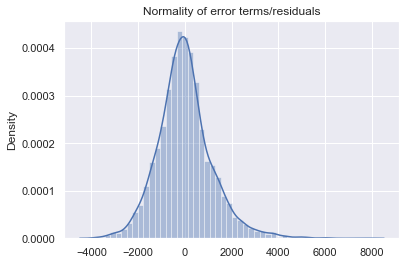

In [178]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### Autocorrelation of residuals

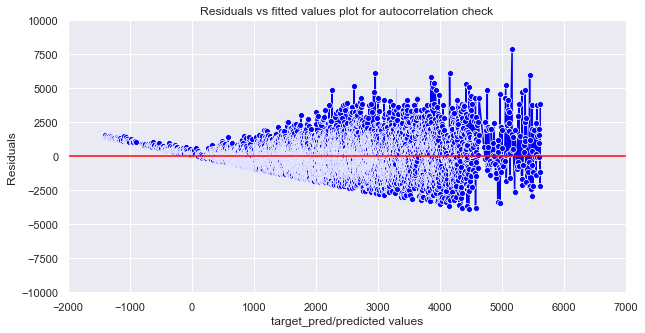

In [179]:
plt.figure(figsize=(10,5))
p = sns.lineplot(target_pred_train,residuals,marker='o',color='blue')
plt.xlabel('target_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10000,10000)
plt.xlim(-2000,7000)
p = sns.lineplot([-5000,7000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### Normality test

C:\Users\Samina\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


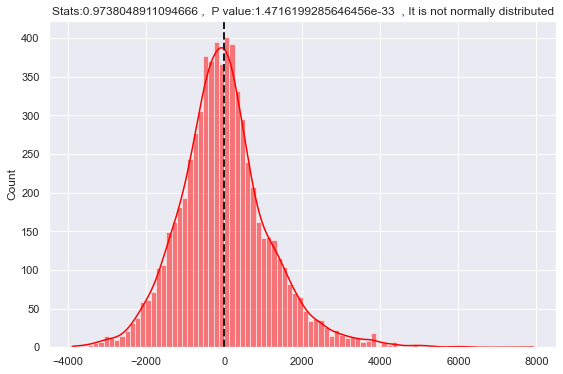

In [180]:
from scipy.stats import shapiro
stat1, p1 = shapiro(residuals)
if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'
plt.figure(figsize=(20,6)) 
plt.subplot(121)
sns.histplot(residuals,kde=True, color='red')
plt.axvline(residuals.mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)
plt.show()